In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
from dateutil.relativedelta import relativedelta
import datetime

In [2]:
path = 'data/database.sqlite'
con = sql.connect(path)

In [3]:
best_players = pd.read_excel('data/best_players.xlsx')
player = pd.read_sql('select * from Player;', con)
player_attributes = pd.read_sql('select * from Player_Attributes;', con)

In [4]:
player_attributes.date = pd.to_datetime(player_attributes.date)
player_best = player[player.player_name.isin(best_players.name.to_list())]
duplicate_players = player_best.player_name[player_best.player_name.duplicated()].to_list()
best_players[best_players.name.isin(duplicate_players)]
player_best[player_best.player_name.isin(duplicate_players)]
player_best = player_best.drop(index = [1407, 6177])
best_players = best_players.merge(player_best, left_on = 'name', right_on = 'player_name')

best_players.set_index('id')[['player_api_id', 
                              'player_fifa_api_id', 
                              'name', 'season', 
                              'birthday', 'height', 
                              'weight', 'league', 
                              'champion']]
best_players.birthday = pd.to_datetime(best_players.birthday)

In [5]:
def seasonize_dates(df):
    
    #Create the season column
    df['season'] = player_attributes.date
    
    #Equate to the current year where date is after June (e.g. 2015-9-12 is for season 2015-16)
    #Equate to the previous year where date is before June (e.g. 2011-2-18 is for season 2010-11)
    #In this way we only need to add the year after to all records to finish the seasonizing of the dates
    df.season = np.where(df.season.dt.month > 6, df.season.dt.year, df.season.dt.year - 1)
    
    #Add the next year as string to the column (e.g. if 2015 = "2015-(2015 - 1999)" =  "2015-16")
    df.season = df.season.astype('str').str.cat((df.season - 1999).astype('str'), sep = '–')
    
    return df

In [6]:
player_attributes = seasonize_dates(player_attributes)

In [7]:
player_attributes.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'season'],
      dtype='object')

In [8]:
player_attributes = player_attributes[['season', 'date', 'player_api_id', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle']]

Goalkeeping attributes removed as there are no Goalkeepers in the best_payers list

In [9]:
player_attributes

,season,date,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
0,2015–16,2016-02-18,505942,67.0,71.0,right,medium,medium,49.0,44.0,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
1,2015–16,2015-11-19,505942,67.0,71.0,right,medium,medium,49.0,44.0,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
2,2015–16,2015-09-21,505942,62.0,66.0,right,medium,medium,49.0,44.0,...,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0
3,2014–15,2015-03-20,505942,61.0,65.0,right,medium,medium,48.0,43.0,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
4,2006–7,2007-02-22,505942,61.0,65.0,right,medium,medium,48.0,43.0,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,2009–10,2009-08-30,39902,83.0,85.0,right,medium,low,84.0,77.0,...,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0
183974,2008–9,2009-02-22,39902,78.0,80.0,right,medium,low,74.0,76.0,...,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0
183975,2008–9,2008-08-30,39902,77.0,80.0,right,medium,low,74.0,71.0,...,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0
183976,2007–8,2007-08-30,39902,78.0,81.0,right,medium,low,74.0,64.0,...,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0


In [44]:
best_players.season.loc[:'season'].val

0      2008–9
1     2010–11
2     2009–10
3     2011–12
4     2012–13
       ...   
67    2011–12
68    2012–13
69    2013–14
70    2014–15
71    2015–16
Name: season, Length: 72, dtype: object

In [10]:
season_values = list(x for x in best_players.season)
season_values[0]

api_id_values = list(x for x in best_players.player_api_id)
api_id_values[0]

30865

In [11]:
player_attributes[(player_attributes.season == season_values[0]) & (player_attributes.player_api_id == api_id_values[0])]

,season,date,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
131148,2008–9,2009-02-22,30865,87.0,90.0,right,medium,high,40.0,41.0,...,92.0,35.0,93.0,84.0,88.0,63.0,79.0,88.0,90.0,85.0
131149,2008–9,2008-08-30,30865,86.0,88.0,right,medium,high,40.0,38.0,...,92.0,35.0,93.0,81.0,84.0,63.0,79.0,84.0,90.0,85.0


In [130]:
#player_attributes = player_attributes.drop_duplicates(subset = ['season', 'player_api_id'])
pl_best_players = best_players[best_players.league == 'England Premier League']
pl_best_players = pl_best_players.merge(player_attributes, how = 'left', on = ['season', 'player_api_id'], sort = True)

In [131]:
pl_best_players


,season,name,club,champion,league,id,player_api_id,player_name,player_fifa_api_id,birthday,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
0,2008–9,Nemanja Vidic,Manchester United,1,England Premier League,7846,30865,Nemanja Vidic,140601,1981-10-21,...,92.0,35.0,93.0,84.0,88.0,63.0,79.0,88.0,90.0,85.0
1,2008–9,Nemanja Vidic,Manchester United,1,England Premier League,7846,30865,Nemanja Vidic,140601,1981-10-21,...,92.0,35.0,93.0,81.0,84.0,63.0,79.0,84.0,90.0,85.0
2,2009–10,Wayne Rooney,Manchester United,0,England Premier League,10749,30829,Wayne Rooney,54050,1985-10-24,...,89.0,87.0,94.0,84.0,89.0,88.0,88.0,37.0,36.0,41.0
3,2009–10,Wayne Rooney,Manchester United,0,England Premier League,10749,30829,Wayne Rooney,54050,1985-10-24,...,89.0,87.0,94.0,80.0,84.0,88.0,88.0,26.0,36.0,41.0
4,2010–11,Nemanja Vidic,Manchester United,1,England Premier League,7846,30865,Nemanja Vidic,140601,1981-10-21,...,92.0,35.0,92.0,83.0,50.0,63.0,62.0,90.0,94.0,85.0
5,2010–11,Nemanja Vidic,Manchester United,1,England Premier League,7846,30865,Nemanja Vidic,140601,1981-10-21,...,92.0,35.0,92.0,85.0,44.0,63.0,62.0,90.0,94.0,85.0
6,2011–12,Vincent Kompany,Manchester City,1,England Premier League,10645,39027,Vincent Kompany,139720,1986-04-10,...,88.0,67.0,75.0,87.0,41.0,63.0,63.0,84.0,90.0,85.0
7,2011–12,Vincent Kompany,Manchester City,1,England Premier League,10645,39027,Vincent Kompany,139720,1986-04-10,...,88.0,67.0,75.0,87.0,41.0,63.0,63.0,83.0,88.0,85.0
8,2012–13,Gareth Bale,Tottenham Hotspur,0,England Premier League,3660,31921,Gareth Bale,173731,1989-07-16,...,79.0,86.0,77.0,67.0,83.0,78.0,76.0,68.0,75.0,74.0
9,2012–13,Gareth Bale,Tottenham Hotspur,0,England Premier League,3660,31921,Gareth Bale,173731,1989-07-16,...,79.0,85.0,77.0,67.0,83.0,78.0,76.0,68.0,75.0,74.0


In [132]:
pl_best_players.columns

Index(['season', 'name', 'club', 'champion', 'league', 'id', 'player_api_id',
       'player_name', 'player_fifa_api_id', 'birthday', 'height', 'weight',
       'date', 'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [133]:
pl_best_players = pl_best_players[['player_api_id', 'season', 'date', 'name', 'club', 'champion', 
       'birthday', 'height', 'weight',
       'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle']]

In [134]:
pl_best_players

,player_api_id,season,date,name,club,champion,birthday,height,weight,overall_rating,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
0,30865,2008–9,2009-02-22,Nemanja Vidic,Manchester United,1,1981-10-21,190.50,194,87.0,...,92.0,35.0,93.0,84.0,88.0,63.0,79.0,88.0,90.0,85.0
1,30865,2008–9,2008-08-30,Nemanja Vidic,Manchester United,1,1981-10-21,190.50,194,86.0,...,92.0,35.0,93.0,81.0,84.0,63.0,79.0,84.0,90.0,85.0
2,30829,2009–10,2010-02-22,Wayne Rooney,Manchester United,0,1985-10-24,175.26,183,89.0,...,89.0,87.0,94.0,84.0,89.0,88.0,88.0,37.0,36.0,41.0
3,30829,2009–10,2009-08-30,Wayne Rooney,Manchester United,0,1985-10-24,175.26,183,87.0,...,89.0,87.0,94.0,80.0,84.0,88.0,88.0,26.0,36.0,41.0
4,30865,2010–11,2011-02-22,Nemanja Vidic,Manchester United,1,1981-10-21,190.50,194,87.0,...,92.0,35.0,92.0,83.0,50.0,63.0,62.0,90.0,94.0,85.0
5,30865,2010–11,2010-08-30,Nemanja Vidic,Manchester United,1,1981-10-21,190.50,194,87.0,...,92.0,35.0,92.0,85.0,44.0,63.0,62.0,90.0,94.0,85.0
6,39027,2011–12,2012-02-22,Vincent Kompany,Manchester City,1,1986-04-10,193.04,187,85.0,...,88.0,67.0,75.0,87.0,41.0,63.0,63.0,84.0,90.0,85.0
7,39027,2011–12,2011-08-30,Vincent Kompany,Manchester City,1,1986-04-10,193.04,187,84.0,...,88.0,67.0,75.0,87.0,41.0,63.0,63.0,83.0,88.0,85.0
8,31921,2012–13,2013-05-10,Gareth Bale,Tottenham Hotspur,0,1989-07-16,182.88,163,86.0,...,79.0,86.0,77.0,67.0,83.0,78.0,76.0,68.0,75.0,74.0
9,31921,2012–13,2013-04-12,Gareth Bale,Tottenham Hotspur,0,1989-07-16,182.88,163,86.0,...,79.0,85.0,77.0,67.0,83.0,78.0,76.0,68.0,75.0,74.0


In [32]:
(pl_best_players.date[1] - pl_best_players.birthday[1]).strftime("%Y-%m-%d")

AttributeError: 'Timedelta' object has no attribute 'strftime'

In [29]:
relativedelta(years = pl_best_players.date[1] - pl_best_players.birthday[1])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Timedelta'

In [135]:
def age(dob, season_date):
    date = season_date
    years = date.year - dob.year

    try:
        birthday = datetime.date(date.year, dob.month, dob.day)
    except ValueError as e:
        if dob.month == 2 and dob.day == 29:
            birthday = get_leap_birthday(date.year)
        else:
            raise e

    if date < birthday:
        years -= 1
    return years

In [120]:
pl_best_players.birthday[3]

Timestamp('1981-10-21 00:00:00')

In [54]:
pl_best_players.birthday[5], pl_best_players.date[5]

(Timestamp('1985-10-24 00:00:00'), Timestamp('2009-08-30 00:00:00'))

In [136]:
age(pl_best_players.birthday[5], pl_best_players.date[5])

28

In [137]:
def age_column(df):
    age_column = []
    for _ in range(len(df)):
        age_column.append(age(pl_best_players.birthday[_], pl_best_players.date[_]))
    df['age'] = age_column
    return

In [138]:
age_column(pl_best_players)

C:\Users\satanasov\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [139]:
pl_best_players.columns

Index(['player_api_id', 'season', 'date', 'name', 'club', 'champion',
       'birthday', 'height', 'weight', 'overall_rating', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'age'],
      dtype='object')

In [140]:
pl_best_players_attributes = pl_best_players[['player_api_id', 'season', 'date', 'champion',
        'attacking_work_rate', 'defensive_work_rate',
        'age', 'overall_rating', 'potential',
        'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
        'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
        'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
        'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
        'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
        ]]

In [185]:
pl_best_players_attributes.player_api_id.count()

8

In [142]:
pl_best_players_attributes.player_api_id.unique()[1]

30829

In [143]:
pl_best_players_attributes[pl_best_players_attributes.player_api_id == 
                           pl_best_players_attributes.player_api_id.unique()[1]].iloc[:,6:].mean()

age                   23.5
overall_rating        88.0
potential             91.5
crossing              80.5
finishing             92.5
heading_accuracy      76.5
short_passing         88.0
volleys               89.0
dribbling             86.0
curve                 81.0
free_kick_accuracy    80.0
long_passing          83.0
ball_control          92.0
acceleration          86.0
sprint_speed          84.5
agility               80.0
reactions             86.5
balance               89.0
shot_power            91.5
jumping               79.0
stamina               87.0
strength              89.0
long_shots            87.0
aggression            94.0
interceptions         82.0
positioning           86.5
vision                88.0
penalties             88.0
dtype: float64

In [147]:
attributes_season_mean = pl_best_players_attributes.groupby(['player_api_id', 'season'])[['player_api_id', 'age', 'overall_rating', 'potential',
        'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
        'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
        'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
        'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
        'aggression', 'interceptions', 'positioning', 'vision', 'penalties']].transform('mean')

In [148]:
pl_best_players_attributes.groupby(['player_api_id', 'season'])[['player_api_id', 'age', 'overall_rating', 'potential',
        'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
        'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
        'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
        'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
        'aggression', 'interceptions', 'positioning', 'vision', 'penalties']]

In [159]:
pl_best_players_attributes.groupby(['player_api_id', 'attacking_work_rate']).groups

{(30829, 'high'): Int64Index([2, 3], dtype='int64'),
 (30865, 'medium'): Int64Index([0, 1, 4, 5], dtype='int64'),
 (31921, 'high'): Int64Index([8, 9, 10, 11, 12, 13], dtype='int64'),
 (39027, 'medium'): Int64Index([6, 7], dtype='int64'),
 (40636,
  'high'): Int64Index([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], dtype='int64'),
 (107417, 'high'): Int64Index([25, 26, 27, 28, 29], dtype='int64'),
 (286119,
  'high'): Int64Index([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype='int64')}

It appears that `attacking_work_rate` is consistent across the season for all players

Let's check that for the other categorical variable `defensive_work_rate`.

In [161]:
pl_best_players_attributes.groupby(['player_api_id', 'defensive_work_rate']).groups

{(30829, 'high'): Int64Index([2, 3], dtype='int64'),
 (30865, 'high'): Int64Index([0, 1, 4, 5], dtype='int64'),
 (31921, 'medium'): Int64Index([8, 9, 10, 11, 12, 13], dtype='int64'),
 (39027, 'high'): Int64Index([6, 7], dtype='int64'),
 (40636,
  'medium'): Int64Index([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], dtype='int64'),
 (107417, 'medium'): Int64Index([25, 26, 27, 28, 29], dtype='int64'),
 (286119,
  'high'): Int64Index([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype='int64')}

Same here, each `player_api_id` has only one category out of low/medium/high.

We can apply the present values for both `attacking_work_rate` and `defensive_work_rate` across each players.

In [172]:
pl_best_players_attributes[['age', 'overall_rating', 'potential',
        'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
        'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
        'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
        'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
        'aggression', 'interceptions', 'positioning', 'vision', 'penalties']] = attributes_season_mean[['age', 'overall_rating', 'potential',
        'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
        'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
        'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
        'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
        'aggression', 'interceptions', 'positioning', 'vision', 'penalties']]

C:\Users\satanasov\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [171]:
pl_best_players_attributes[['age', 'overall_rating', 'potential',
        'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
        'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
        'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
        'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
        'aggression', 'interceptions', 'positioning', 'vision', 'penalties']].shape, attributes_season_mean[['age', 'overall_rating', 'potential',
        'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
        'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
        'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
        'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
        'aggression', 'interceptions', 'positioning', 'vision', 'penalties']].shape

((45, 28), (45, 28))

In [173]:
pl_best_players_attributes

,player_api_id,season,date,champion,attacking_work_rate,defensive_work_rate,age,overall_rating,potential,crossing,...,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties
0,30865,2008–9,2009-02-22,1,medium,high,26.500000,86.500000,89.000000,40.0,...,60.000000,92.0,80.5,92.000000,35.000000,93.0,82.5,86.000000,63.000000,79.000000
1,30865,2008–9,2008-08-30,1,medium,high,26.500000,86.500000,89.000000,40.0,...,60.000000,92.0,80.5,92.000000,35.000000,93.0,82.5,86.000000,63.000000,79.000000
2,30829,2009–10,2010-02-22,0,high,high,23.500000,88.000000,91.500000,80.5,...,91.500000,79.0,87.0,89.000000,87.000000,94.0,82.0,86.500000,88.000000,88.000000
3,30829,2009–10,2009-08-30,0,high,high,23.500000,88.000000,91.500000,80.5,...,91.500000,79.0,87.0,89.000000,87.000000,94.0,82.0,86.500000,88.000000,88.000000
4,30865,2010–11,2011-02-22,1,medium,high,28.500000,87.000000,90.000000,40.0,...,60.000000,92.0,69.0,92.000000,35.000000,92.0,84.0,47.000000,63.000000,62.000000
5,30865,2010–11,2010-08-30,1,medium,high,28.500000,87.000000,90.000000,40.0,...,60.000000,92.0,69.0,92.000000,35.000000,92.0,84.0,47.000000,63.000000,62.000000
6,39027,2011–12,2012-02-22,1,medium,high,25.000000,84.500000,88.500000,61.0,...,76.000000,70.5,70.0,88.000000,67.000000,75.0,87.0,41.000000,63.000000,63.000000
7,39027,2011–12,2011-08-30,1,medium,high,25.000000,84.500000,88.500000,61.0,...,76.000000,70.5,70.0,88.000000,67.000000,75.0,87.0,41.000000,63.000000,63.000000
8,31921,2012–13,2013-05-10,0,high,medium,23.000000,85.666667,90.833333,84.0,...,84.000000,68.0,90.0,77.833333,82.500000,77.0,67.5,82.166667,78.000000,74.500000
9,31921,2012–13,2013-04-12,0,high,medium,23.000000,85.666667,90.833333,84.0,...,84.000000,68.0,90.0,77.833333,82.500000,77.0,67.5,82.166667,78.000000,74.500000


Now we can remove all duplicate rows and we will be left with unique player/season attributes data.

Would the `date` column be an issue since it is has unique values? Let's try, if yes, we can drop it already.

In [176]:
pl_best_players_attributes.drop_duplicates()

,player_api_id,season,date,champion,attacking_work_rate,defensive_work_rate,age,overall_rating,potential,crossing,...,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties
0,30865,2008–9,2009-02-22,1,medium,high,26.500000,86.500000,89.000000,40.0,...,60.000000,92.0,80.5,92.000000,35.000000,93.0,82.5,86.000000,63.000000,79.000000
1,30865,2008–9,2008-08-30,1,medium,high,26.500000,86.500000,89.000000,40.0,...,60.000000,92.0,80.5,92.000000,35.000000,93.0,82.5,86.000000,63.000000,79.000000
2,30829,2009–10,2010-02-22,0,high,high,23.500000,88.000000,91.500000,80.5,...,91.500000,79.0,87.0,89.000000,87.000000,94.0,82.0,86.500000,88.000000,88.000000
3,30829,2009–10,2009-08-30,0,high,high,23.500000,88.000000,91.500000,80.5,...,91.500000,79.0,87.0,89.000000,87.000000,94.0,82.0,86.500000,88.000000,88.000000
4,30865,2010–11,2011-02-22,1,medium,high,28.500000,87.000000,90.000000,40.0,...,60.000000,92.0,69.0,92.000000,35.000000,92.0,84.0,47.000000,63.000000,62.000000
5,30865,2010–11,2010-08-30,1,medium,high,28.500000,87.000000,90.000000,40.0,...,60.000000,92.0,69.0,92.000000,35.000000,92.0,84.0,47.000000,63.000000,62.000000
6,39027,2011–12,2012-02-22,1,medium,high,25.000000,84.500000,88.500000,61.0,...,76.000000,70.5,70.0,88.000000,67.000000,75.0,87.0,41.000000,63.000000,63.000000
7,39027,2011–12,2011-08-30,1,medium,high,25.000000,84.500000,88.500000,61.0,...,76.000000,70.5,70.0,88.000000,67.000000,75.0,87.0,41.000000,63.000000,63.000000
8,31921,2012–13,2013-05-10,0,high,medium,23.000000,85.666667,90.833333,84.0,...,84.000000,68.0,90.0,77.833333,82.500000,77.0,67.5,82.166667,78.000000,74.500000
9,31921,2012–13,2013-04-12,0,high,medium,23.000000,85.666667,90.833333,84.0,...,84.000000,68.0,90.0,77.833333,82.500000,77.0,67.5,82.166667,78.000000,74.500000


Let's try dropping the `date` column. it is no longer needed anyway.

In [179]:
pl_best_players_attributes = pl_best_players_attributes.drop(columns = ['date'])

Now it should work!

In [182]:
pl_best_players_attributes = pl_best_players_attributes.drop_duplicates()

In [183]:
#Voala, 
pl_best_players_attributes

,player_api_id,season,champion,attacking_work_rate,defensive_work_rate,age,overall_rating,potential,crossing,finishing,...,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties
0,30865,2008–9,1,medium,high,26.500000,86.500000,89.000000,40.0,39.500000,...,60.000000,92.0,80.5,92.000000,35.000000,93.0,82.5,86.000000,63.000000,79.000000
2,30829,2009–10,0,high,high,23.500000,88.000000,91.500000,80.5,92.500000,...,91.500000,79.0,87.0,89.000000,87.000000,94.0,82.0,86.500000,88.000000,88.000000
4,30865,2010–11,1,medium,high,28.500000,87.000000,90.000000,40.0,41.000000,...,60.000000,92.0,69.0,92.000000,35.000000,92.0,84.0,47.000000,63.000000,62.000000
6,39027,2011–12,1,medium,high,25.000000,84.500000,88.500000,61.0,45.000000,...,76.000000,70.5,70.0,88.000000,67.000000,75.0,87.0,41.000000,63.000000,63.000000
8,31921,2012–13,0,high,medium,23.000000,85.666667,90.833333,84.0,82.666667,...,84.000000,68.0,90.0,77.833333,82.500000,77.0,67.5,82.166667,78.000000,74.500000
14,40636,2013–14,0,high,medium,26.454545,87.363636,87.636364,77.0,86.272727,...,82.636364,69.0,86.0,76.000000,82.454545,78.0,41.0,86.000000,82.363636,85.000000
25,107417,2014–15,1,high,medium,23.600000,88.000000,90.000000,78.0,83.000000,...,79.000000,59.0,74.0,63.000000,82.000000,54.0,41.0,84.000000,86.000000,86.000000
30,286119,2015–16,1,high,high,28.466667,74.866667,74.866667,61.8,77.000000,...,79.000000,66.4,90.0,68.466667,68.000000,88.4,51.0,76.866667,67.400000,71.733333


<function matplotlib.pyplot.show(*args, **kw)>

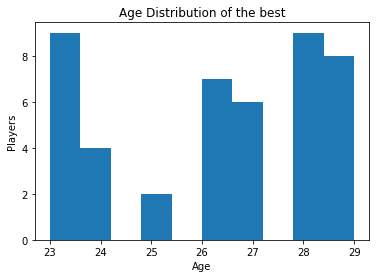

In [188]:
plt.hist(pl_best_players.age)
plt.title('Age Distribution of the best')
plt.xlabel('Age')
plt.ylabel('Players')
plt.show